In [56]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from typing import Tuple
from statsmodels.graphics import tsaplots
%matplotlib notebook

## To do
1. update matrix multiplication to @
2. typing
3. docstring
4. exception using assert
5. convert to classes

## Refactor code for simulation the true position, velocity and observation of a particle

In [5]:
def x_true(F: np.ndarray, G:np.ndarray, H:np.ndarray, Q:np.ndarray, R:np.ndarray, x0:np.ndarray, t_steps:int) -> Tuple[np.ndarray, np.ndarray]:
    '''
    A function to compute true state-space history
    and true observations from a discrete-time
    model with no input. For use with a Kalman Filter.
    
    Args:
        F (numpy.ndarray):  Xsize*Xsize state transition matrix
        G (numpy.ndarray):  Xsize*Vsize state noise transition matrix
        H (numpy.ndarray):  Zsize*Xsize observation matrix
        Q (numpy.ndarray):  Vsize*Vsize process noise covariance matrix
        R (numpy.ndarray):  Zsize*Zsize observation noise covariance matrix
        x0 (numpy.ndarray): Xsize*1 initial state vector 
        t_steps (int): number of time-steps to be simulated
        
    Returns:
        z (numpy.ndarray): Zsize*t_steps Observation time history
        x (numpy.ndarray): Xsize*t_steps true state time history
    ''' 
    # First check all matrix dimensions
    assert F.shape[0] == F.shape[1], 'F is non-square'
    assert x0.shape[0] == F.shape[0], 'x0 does not match dimension of F'
    assert G.shape[0] == x0.shape[0], 'G does not match dimension of x0 or F'
    assert Q.shape[0] == Q.shape[1], 'Q must be square'
    assert Q.shape[0] == G.shape[1], 'Q does not match dimension of G'
    assert H.shape[1] == x0.shape[0], 'H and Xsize do not match'
    assert R.shape[0] == R.shape[1], 'R must be square'      
    assert R.shape[0] == H.shape[0], 'R must match Zsize of H'

    # define a few parameters for output matrix dimension specification
    Xsize = x0.shape[0]
    Zsize = H.shape[0]
    Vsize = G.shape[1]
    
    # fix up output matricies   
    x = np.zeros((Xsize, t_steps+1))
    z = np.zeros((Zsize, t_steps+1))
    
    # get some gaussian noise - rand('normal')
    v = sqrt(Q) * np.random.randn(Vsize, t_steps+1)
    w = sqrt(R) * np.random.randn(Zsize, t_steps+1)
    
    # initial value
    x0 = x[:,0].reshape(2,1)
    
    # now generate all the remaining states
    for i in range(t_steps):
        x[:, i+1] = F @ x[:,i] + G @ v[:,i] #Assuming no control inputs B and u
        
    # then all the observations
    for i in range(1, t_steps+1):
        z[:, i] = H @ x[:,i] + w[:, i]
        
    return z, x

In [2]:
# observation model
H = np.array([[1, 0]])

# continuous time noise variance, must be square
Q = np.array([[0.01]]) 

# observation noise variance, must be square
R = np.array([[1]])

# initial conditions
x0 = np.array([[0]
            ,[0]])

# sample period
dt = 1.0

# number of time-steps to simulate
t_steps = 500

time = range(t_steps+1)

#Transform a continuous to a discrete state-space system.
F = np.array([[1, dt]
            , [0, 1]])

G = np.array([[dt**2/2]
            , [dt]])

In [6]:
# Run simulation
z, x = x_true(F, G, H, Q, R, x0, t_steps)

## Class implementation

In [58]:
class Diagnostics_plots():
    '''Class works for both simulation and Kalman Filter Estimation'''
    def __init__():
        pass
    
    def plot_TruePos(self, x):
        '''Simulation: Plots simulated true position of a particle'''
        plt.figure()
        plt.title('True Position')
        plt.xlabel('Time (Seconds)')
        plt.ylabel('Position (Meters)')
        plt.plot(range(self.t_steps), x[0,:])
        return plt.show()
    
    def plot_TrueVelocity(self, x):
        '''Simulation: Plots simulated true velocity of a particle'''
        plt.figure()
        plt.title('True Velocity')
        plt.xlabel('Velocity (Meters/Seconds)')
        plt.ylabel('Position (Meters)')
        plt.plot(range(self.t_steps), x[1,:])
        return plt.show()
    
    def plot_Obs(self, z):
        '''Simulation: Plots true observations of a particle'''
        plt.figure()
        plt.title('Position Observations')
        plt.xlabel('Time (Seconds)')
        plt.ylabel('Position Measurement (Meters)')
        plt.plot(range(self.t_steps), z[0,:])
        return plt.show()
    
    def plot_TruePos_Obs(self, x, z):
        '''Simulation: Compare true position and observations of a particle'''
        plt.figure()
        plt.title('Compare true position and observations')
        plt.xlabel('Time (Seconds)')
        plt.ylabel('Position (Meters)')
        plt.plot(range(self.t_steps), x[0,:])
        plt.plot(range(self.t_steps), z[0,:])
        return plt.show()
    
    def plot_est_predTrack(self, x, z, xpred, xest): #we can make true observation optional. 
        '''Kalman Filter: Compare estimated and predicted target track against true'''
        plt.figure()
        plt.title('Estimated and Predicted Target Track')
        plt.xlabel('Time (Seconds)')
        plt.ylabel('Position (Meters)')
        plt.legend()
        
        plt.plot(range(self.t_steps), x[0,:], label = 'True Position')
        plt.plot(range(self.t_steps), z[0,:], label = 'Observation Position', linestyle = '--')
        plt.plot(range(self.t_steps), xpred[0,:], label = 'Predicted Position', linestyle = ':')
        plt.plot(range(self.t_steps), xest[0,:], label = 'Estimated Position', linestyle = '-.')
        return plt.show()
    
    def plot_innov(self, xinnov):
        '''Plot innovation''' 
        innov_std = xinnov[0].std()

        plt.figure()
        plt.title('Innovation')
        plt.xlabel('Time (Seconds)')
        plt.ylabel('Innovation (Meters)')
        plt.legend(loc = 'upper right')
        
        plt.plot(range(self.t_steps), xinnov[0,:], label = 'Innovation')
        plt.axhline(innov_std, color = 'green', label = 'Innovation std', linestyle = ':')
        plt.axhline(-innov_std, color = 'green', linestyle = ':')
        plt.axhline(2*innov_std, color = 'lawngreen', label = 'Innovation 2 std')
        plt.axhline(-2*innov_std, color = 'lawngreen')
        return plt.show()

    def plot_autocorr(self, xinnov):
        '''Plot autocorrelation of innovation - test for whiteness'''
        tsaplots.plot_acf(xinnov[0,:])
        return plt.show()

In [45]:
class Simulate(Diagnostics_plots):
    '''
        Class computes true state-space history
        and true observations from a discrete-time
        model with no input. For use with a Kalman Filter.
    '''

    def __init__(self, F_init, G_init, H_init, Q_init, R_init, x0_init, t_steps_init):
        '''
        Initialise the class
        Args:
            F (numpy.ndarray):  Xsize*Xsize state transition matrix
            G (numpy.ndarray):  Xsize*Vsize state noise transition matrix
            H (numpy.ndarray):  Zsize*Xsize observation matrix
            Q (numpy.ndarray):  Vsize*Vsize process noise covariance matrix
            R (numpy.ndarray):  Zsize*Zsize observation noise covariance matrix
            x0 (numpy.ndarray): Xsize*1 initial state vector 
            t_steps (int): number of time-steps to be simulated

        Returns:
            z (numpy.ndarray): Zsize*t_steps Observation time history
            x (numpy.ndarray): Xsize*t_steps true state time history
        '''
        self.F = F_init
        self.G = G_init
        self.H = H_init
        self.Q = Q_init
        self.R = R_init
        self.x0 = x0_init
        self.t_steps = t_steps_init       
    
    def _validate_data(self):
        '''Validate input data.'''
        assert self.F.shape[0] == self.F.shape[1], 'F is non-square'
        assert self.x0.shape[0] == self.F.shape[0], 'x0 does not match dimension of F'
        assert self.G.shape[0] == self.x0.shape[0], 'G does not match dimension of x0 or F'
        assert self.Q.shape[0] == self.Q.shape[1], 'Q must be square'
        assert self.Q.shape[0] == self.G.shape[1], 'Q does not match dimension of G'
        assert self.H.shape[1] == self.x0.shape[0], 'H and Xsize do not match'
        assert self.R.shape[0] == self.R.shape[1], 'R must be square'      
        assert self.R.shape[0] == self.H.shape[0], 'R must match Zsize of H'
        return self.F, self.G, self.H, self.Q, self.R, self.x0
        
    def simulate(self):
        '''Purpose is to simulate the true position and velosity of a particle'''     
        
        # validate data first
        F, G, H, Q, R, x0 = self._validate_data()
        
        # define a few parameters for output matrix dimension specification
        self.Xsize = x0.shape[0]
        self.Zsize = H.shape[0]
        self.Vsize = G.shape[1]
        
        # fix up output matricies   
        x = np.zeros((self.Xsize, self.t_steps))
        z = np.zeros((self.Zsize, self.t_steps))

        # get some gaussian noise - rand('normal')
        v = sqrt(Q) * np.random.randn(self.Vsize, self.t_steps+1)
        w = sqrt(R) * np.random.randn(self.Zsize, self.t_steps+1)
    
        # initial value
        self.x0 = x[:,0].reshape(2,1)
        
        # now generate all the remaining states
        for i in range(self.t_steps-1):
            x[:, i+1] = F @ x[:,i] + G @ v[:,i] #Assuming no control inputs B and u

        # then all the observations
        for i in range(self.t_steps):
            z[:, i] = H @ x[:,i] + w[:, i]
        
        return z, x
    
    def __str__(self):
        return 'Simulate data.'

In [46]:
simulate_dta = Simulate(F, G, H, Q, R, x0, t_steps)
print(simulate_dta)

Simulate data.


In [47]:
F_c, G_c, H_c, Q_c, R_c, x0_c = simulate_dta._validate_data()
print(F_c)

[[1. 1.]
 [0. 1.]]


In [48]:
z, x = simulate_dta.simulate()

<IPython.core.display.Javascript object>


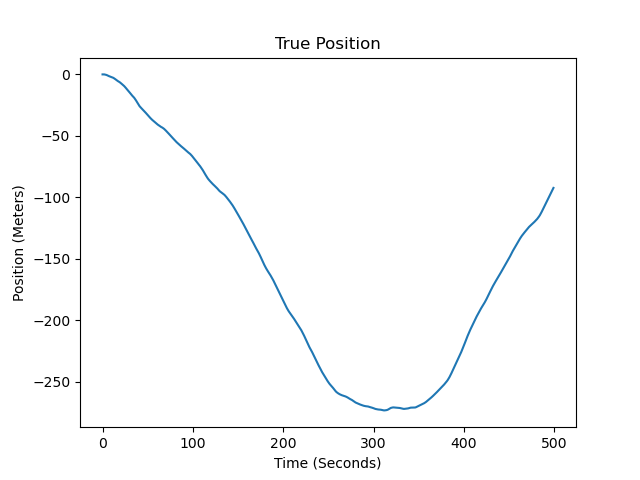

In [49]:
simulate_dta.plot_TruePos(x)

<IPython.core.display.Javascript object>


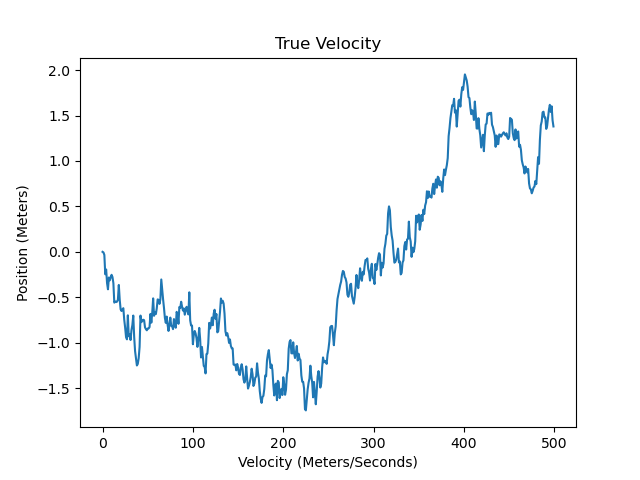

In [50]:
simulate_dta.plot_TrueVelocity(x)

<IPython.core.display.Javascript object>


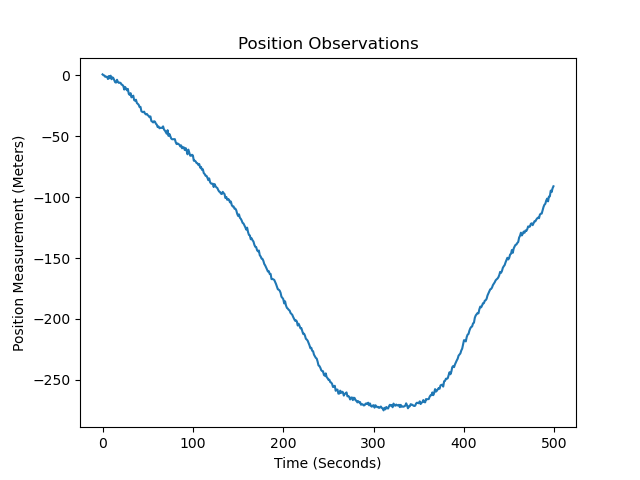

In [51]:
simulate_dta.plot_Obs(z)

<IPython.core.display.Javascript object>


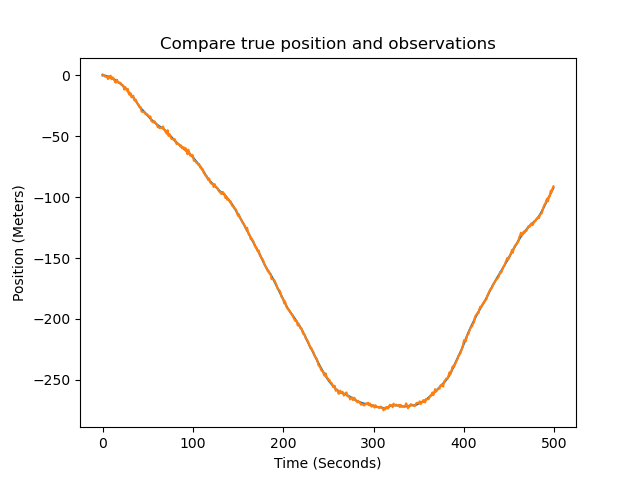

In [52]:
simulate_dta.plot_TruePos_Obs(x, z)